# Clasificación

En este notebook trataremos algunos de los conceptos teóricos vistos durante la primera parte del día de hoy. 

Entre ellos: 

*   Un ejemplo de _clasificación_
*   Clasificación _binaria_
*   Medidas de desempeño
*   Curvas ROC 
*   Curvas Precisión-Sensibilidad

## Ejemplo de clasificación en _Machine Learning_ (de juguete)

Lo que se ha visto en general refiere a como funcionan los modelos supervisados, en especifico los de clasificación. 

Se debe recordar que los modelos de _Machine Learning_ se utilizan con datos respecto a un determinado **dominio**, el que es descrito (evaluaremos su comportamiento) mediante una cantidad de **features**. 

De lo anterior se recoge: 

Dominio: Muy similar en estadística a la variable de respuesta o dependiente en un modelo. 
Features: Propiedad para una instancia, son numéros en el dominio de los reales. En estadística corresponden a las variables explicativas o independientes del modelo. 

Para ejemplificar esto, veremos un problema sencillo. 



## Clasificación binaria

Con la función make_classification de scikit-learn, creamos un conjunto de datos para clasificar. Para empezar vamos a contar con sólo un atributo o feature y dos clases o categorías. Esto es clasificación binaria.

In [8]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

# Dividimos en base de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

### Modelo que se va a entrenar

Vamos a entrenar un modelo de regresión logística binaria (como ejemplo, ya lo revisaremos en detalle en la siguiente clase) que permita evaluar las distintas medidas que vimos en clases. 

In [9]:
from sklearn.linear_model import LogisticRegression

logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)



## Matriz de confusión 

La matriz de confusión permite observar los tipos de errores cometidos en la estimación del modelo.  

In [10]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[197,  43],
       [ 40, 220]])

### Accuracy o exactitud

Se refiere a las predicciones correctas del total de predicciones del modelo. Esto es la suma de los valores verdaderos (positivos y negativos) respecto del total. 
**Ojo, cuando las clases estan desbalanceadas este no s un buen indicador**

Para nuestro ejemplo, la precisión del modelo es: 

In [4]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.834

### Precision

¿Qué porcentaje de los predichos positivos realmente lo son?. Esto es los valores verdaderos positivos respecto del total de valores positivos predichos.


$$
\text{precision} = \frac{TP}{TP + FP}
$$

Donde $TP$ corresponde a verdaderos positivos (_True Possitive_), $FP$ a falsos positivos (_False Possitives_) y $FN$ los falsos negativos (_False Negatives_).

Para nuestro ejemplo, la precisión del modelo es: 

In [5]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.8365019011406845

### Recall o Sensibilidad

¿Qué porcentaje de clases positivas ha identificado el modelo?. Esto es valores verdaderos positivos respecto del total de positivos reales. 

$$
\text{recall} = \frac{TP}{TP + FN}
$$

Donde $TP$ corresponde a verdaderos positivos (_True Possitive_), $FP$ a falsos positivos (_False Possitives_) y $FN$ los falsos negativos (_False Negatives_).

Para nuestro ejemplo, la recall del modelo es: 

In [6]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.8461538461538461

### F1 Score

Se utiliza para combinar las medidas de precisión y sensibilidad. Ayuda en la interpretación de ambas cuando se requiera su cumplimiento. 

$$
F_1 = 2 \times \frac{\text{precision} \times \text{recall}}{\text{precision} + \text{recall}}
$$

Para nuestro ejemplo, F1 Score sería del modelo es: 

In [7]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.8413001912045889

### Cross validation 

Veremos formas de realizar cross validation con los datos, esto permite verificar que tan bueno es nuestro clasificador, para ello calculamos es el porcentaje de clasificaciones correctas. 

Si el valor es muy alto, ¡deberíamos estar felices!, pero ¿esta es realmente una buena medida para entender nuestro modelo? Vamos a discutir esto en la siguiente sección. Ya sabemos que puede tener algunos problemas. ¿Qué pasa si repetimos este calculo variaas veces, es un valor confiable?

Primero veremos la funcion _cross_val_score_ para que calculemos un indicador de la calidad del modelo en cada iteración. Dependiendo del problema elegiremos un indicador o medida particular. 

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(logistic_regression, X_train, y_train, cv=3, scoring='accuracy')

array([0.84431138, 0.83233533, 0.87349398])

El siguiente codigo permite recoger el valor predicho en cada iteracion

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(logistic_regression, X_train, y_train, cv=3)
# cross_val_predict nos retorna la clase predicha para cada instancia


### _Precision_ y _Recall_

Veamos que pasa al calcular estos indicadores con cross validation. 


In [ ]:
from sklearn.metrics import precision_score, recall_score

y_train_pred = cross_val_predict(logistic_regression, X_train, y_train, cv=3)
precision_score(y_train, y_train_pred)

0.8360655737704918

In [ ]:
recall_score(y_train, y_train_pred)

0.8535564853556485

También podemos evaluar el $F_1$ _score_, que es la media armónica entre _Precision_ y _Recall_:



A veces queremos modelos que beneficien la precisión o el _recall_. Pensemos en los siguientes casos:

- Queremos hacer un modelo que nos diga si ciertos medicamentos son seguros para la salud. Aquí nos interesa estar realmente seguros de si un medicamento es clasificado como seguro (positivo), a pesar de que podamos tener muchos falsos negativos. Aquí queremos altra precisión, a un costo de bajo _recall_.
- Queremos hacer un modelo que recomiende canciones a alguien. Quizás no nos importa equivocarnos a cambio de que todas las posibles canciones que le gustan a la persona sean recomendadas. Aquí tendremos varios falsos positivos, por lo que habrá una baja precisión, pero tendremos un alto _recall_, porque el objetivo era tener pocos falsos negativos.

Así, es necesario _trade-off_ entre precisión y _recall_.

In [ ]:
 from sklearn.metrics import f1_score
 f1_score(y_train, y_train_pred)

0.84472049689441

### La curva ROC

La curva ROC (por sus siglas en inglés, _receiver operating characteristic_) es una herramientra utilizada para medir el desempeño de clasificadores binarios. Esta curva grafica la tasa de verdaderos positivos (que vendría a ser el _recall_) en función de la tasa de falsos positivos ($FPR$ de _False Positive rate_). Es decir:

$$
FPR = \frac{FP}{TN + FP}
$$

Y recordemos que:

$$
\text{recall} = TPR = \frac{TP}{TP + FN}
$$

Donde $FP$ son los falsos positivos y $TN$ vendrían a ser los falsos negativos. Intuitivamente, si el _recall_ incrementa, el costo es tener más falsos positivos. Si lo pensamos de una nueva forma tenemos que:

- La tasa de verdaderos positivos es el porcentaje de las instancias realmente positivas en las que yo digo (correctamente) que son positivas.
- La tasa de falsos positivos es el porcentaje de las instancias realmente negativas en las que yo digo (incorrectamente) que son positivas.

Vamos ahora a graficar la curva.

Sin entrenar: ROC AUC=0.500
Regresión Logística: ROC AUC=0.903


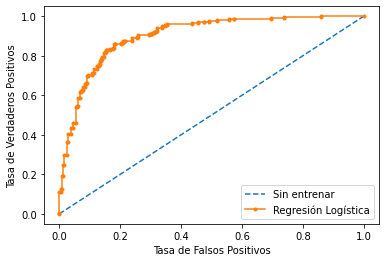

In [12]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
#Generamos un clasificador sin entrenar , que asignará 0 a todo
ns_probs = [0 for _ in range(len(y_test))]
# Predecimos las probabilidades
lr_probs = logistic_regression.predict_proba(X_test)
#Nos quedamos con las probabilidades de la clase positiva (la probabilidad de 1)
lr_probs = lr_probs[:, 1]
# Calculamos el AUC
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Regresión Logística: ROC AUC=%.3f' % (lr_auc))
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Regresión Logística')
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()

In [14]:
from sklearn.metrics import roc_auc_score

# AUC = Area under the curve
roc_auc_score(y_test, lr_probs)

0.9028205128205128

Vemos que tenemos un clasificador razonable.

## Clasificación multiclase

Supongamos que ahora que tenemos una base de datos de pixeles de imagenes de digitos escritos a mano alzada. Cada feature es un pixel y el dominio del problema esta definido a partir de las clases: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9.
Para esto vamos a crear un clasificador de 0s, de 1s, ..., de 8s y de 9s. 

Nuevamente utilizaremos regresión logística. Vamos a ver un ejemplo con el _dataset_ MNIST. 

In [15]:
from sklearn.datasets import load_digits
digits = load_digits()

In [19]:
type(digits.data)

numpy.ndarray

In [20]:
(digits.data.shape, digits.target.shape, digits.images.shape)

((1797, 64), (1797,), (1797, 8, 8))

1797 imágenes, cada una de 8x8 de dimensión y 1797 etiquetas.

Veamos como se observa cada digito de la base de datos. 

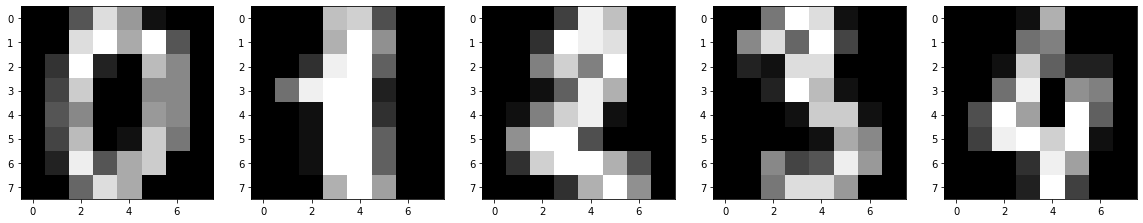

In [16]:
import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)

In [17]:
from sklearn.model_selection import train_test_split
x_train_m, x_test_m, y_train_m, y_test_m = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

In [23]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(fit_intercept=True,
                        multi_class='auto',
                        penalty='l2', #ridge regression
                        solver='saga',
                        max_iter=10000,
                        C=50)
logisticRegr

LogisticRegression(C=50, max_iter=10000, solver='saga')

In [25]:
logisticRegr.fit(x_train_m, y_train_m)

LogisticRegression(C=50, max_iter=10000, solver='saga')

Ahora vamos a evaluar nuestro modelo con _cross-validation_. 

In [28]:
from sklearn.model_selection import cross_val_score
cross_val_score(logisticRegr, x_train_m, y_train_m, cv=5, scoring='accuracy')

array([0.96296296, 0.96296296, 0.96654275, 0.97026022, 0.9739777 ])

Estos son muy buenos puntajes, porque en este caso un clasificador _random_ tendría cerca del 10% de _accuracy_. Vamos a ver la matriz de confusión. 

In [31]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(logisticRegr, x_train_m, y_train_m, cv=5)
conf_mx = confusion_matrix(y_train_m, y_train_pred)
conf_mx

array([[139,   0,   0,   0,   0,   2,   0,   0,   0,   0],
       [  0, 133,   0,   2,   1,   0,   1,   0,   1,   1],
       [  0,   1, 132,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 134,   0,   2,   0,   0,   1,   1],
       [  0,   2,   0,   0, 139,   0,   1,   0,   0,   1],
       [  0,   0,   0,   0,   1, 131,   1,   1,   0,   0],
       [  0,   0,   0,   0,   0,   1, 127,   0,   1,   0],
       [  0,   0,   0,   0,   1,   1,   0, 127,   2,   0],
       [  0,   5,   0,   1,   1,   3,   1,   0, 113,   2],
       [  0,   1,   0,   0,   1,   1,   0,   0,   2, 128]])

Muchas veces es dificil observar los números directamente. En este caso parece mejor observar una imagen con los resultados. Mientras más instancias caen en un determinado casillero, más blanco el casillero. El casillero con el menor valor se lleva el color negro, y el de mayor valor el color blanco.

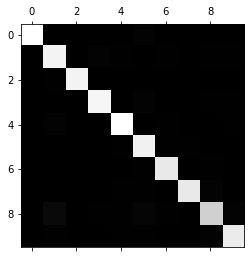

In [34]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

Para revisar mejor los errores vamos a: 

- Dejar en 0 la diagonal para que no nos entregue ruido.
- Normalizar cada fila. Esto es: sumar los valores de cada fila, y dividir todos los elementos de esa fila por el valor. 

Esto se hace porque una clase muy grande se puede ver mal en comparación a otras, pero si lo miramos como _ratio_, puede no ser así.

In [35]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

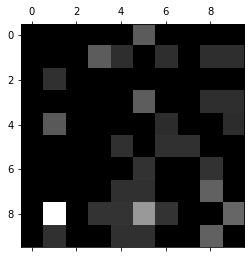

In [36]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()